In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree, ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


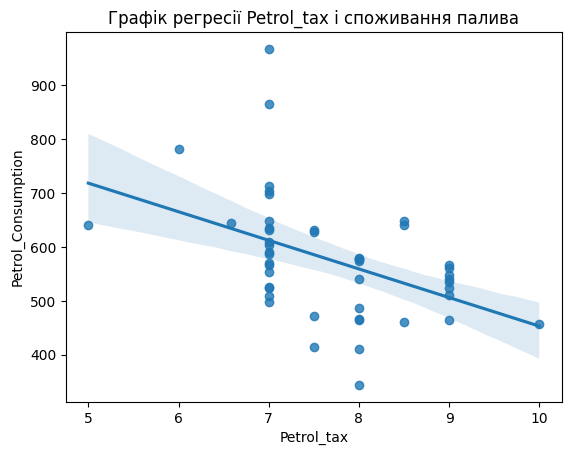

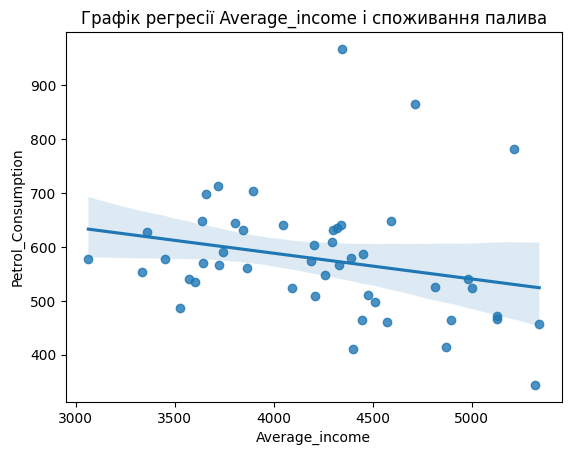

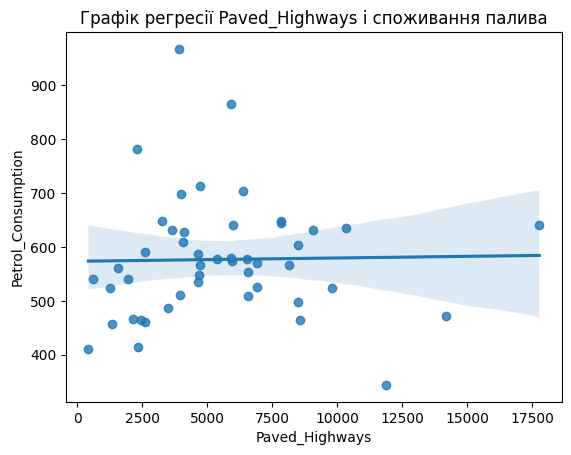

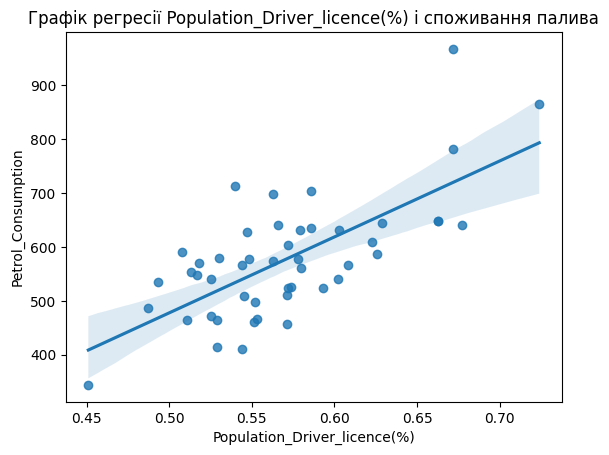

In [4]:
veriables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in veriables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Графік регресії {var} і споживання палива')

In [5]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Кореляція Пірсона')]

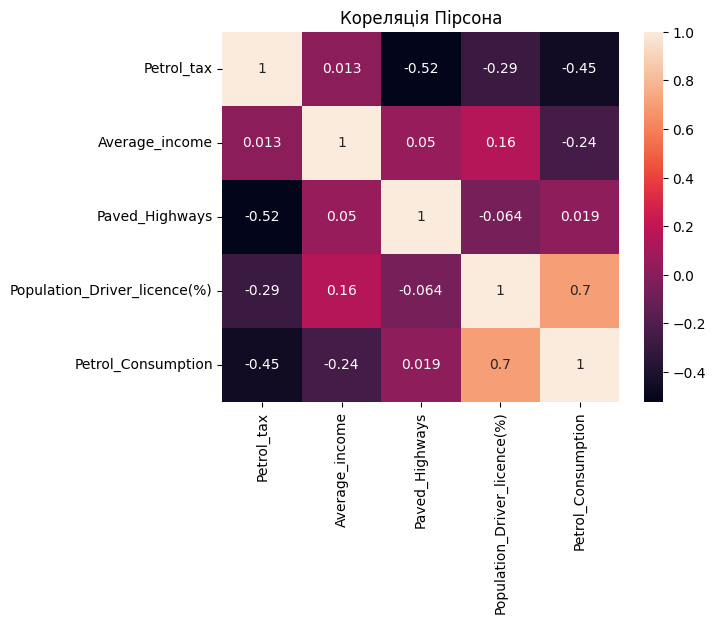

In [6]:
sns.heatmap(corr, annot=True).set(title='Кореляція Пірсона')

In [7]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [8]:
y = df['Petrol_Consumption']
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [9]:
df.shape

(48, 5)

In [10]:
SEED=48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [11]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Intersept: ', regression.intercept_)
print('Coefficients: ', regression.coef_)

Intersept:  344.58590039674596
Coefficients:  [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [13]:
y_pred = regression.predict(X_test)

In [14]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 58.48
MSE: 3983.85
RMSE: 63.12


In [16]:
regression.score(X_train, y_train)

0.6895815278628232

In [17]:
regression.score(X_test, y_test)

0.42818683491379805

Показник прогнозування моделі не високий. Проводимо К-кратну кросс валідацію.

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 38, Test set:10
Fold:2, Train set: 38, Test set:10
Fold:3, Train set: 38, Test set:10
Fold:4, Train set: 39, Test set:9
Fold:5, Train set: 39, Test set:9


In [19]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse={"{:.2f}".format(rmse)}')

In [20]:
score = cross_val_score(LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [ -4083.25587175 -10468.85637678  -2453.65941292  -3853.05818469
  -3173.21607154]
rmse=69.33


Середнє значеня RMSE по п'яти фолдам вище попереднього. Навчимо нашу модель за допомогою Decision Tree Regressor та Random Forest Regressor і порівняємо результати.

In [21]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-17347.7        -17412.3         -6389.6         -7350.66666667
 -13087.22222222]
rmse=110.98


In [22]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [ -7539.12317    -12797.03298     -3600.52778     -2946.84586667
  -6053.55496667]
rmse=81.16


Покращень не відбувається.